# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)

# Mahesh Chilukamari (11761476)

In [2]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   169k      0 --:--:-- --:--:-- --:--:--  172k']

In [3]:
# Read and print first 10 lines of the file
with open("train.dat", "r") as f:
    for _ in range(10):
        print(f.readline().strip())

with open("test.dat", "r") as f:
    for _ in range(10):
        print(f.readline().strip())

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [5]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0 for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0])-1)
    for _ in range(epochs):  
        for instance in instances:
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            for i in range(len(weights)):
                weights[i] += lr * error * output * (1 - output) * instance[i]
    return weights


## Run it

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
Answer:

A perceptron can take inputs and convert them into binary outputs by means of a step function but logistic regression (which can be looked at as a continuous equivalent) uses sigmoid function to produce probability values between 0 and 1.

The step function of a perceptron is non-differentiable; thus, gradient-based optimizers like stochastic gradient descent (SGD) cannot work well with it.

The sigmoid function provides smooth weight updates over its input range because it behaves in a controlled manner across inputs.

The derivative of sigmoid helps to calculate small changes in weights which guarantee convergence during training. 

That is why present neural networks use sigmoid, ReLU, or other differentiable activation functions over step functions of perceptrons.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

An interesting thing about this case was that the perceptron was able to perform extremely well without taking advantage of training on the entire dataset for which it had been initially set-up. To this effect, training with only 200 or 300 examples at a 0.005 learning rate gave an accuracy of 85.7% while using all 400 examples lowered the accuracy to 71.4%. This indicates that sometimes training on a subset would work better because of possibly less overfitting or easier optimization. 
It was also noticed that the lower learning rate of 0.005 worked better in achieving the right results than the higher learning rate of 0.050. So a higher learning rate, while working on a big dataset, would be forcing the model to skip good values of weights and thus introduce instability; while a very low learning rate might just make it converge slowly or get stuck in local minima. So it keeps getting less effective over time.

A. The results indicate that training with merely 200 or 300 examples gave better performance (85.7%) than training with all examples (400 total) which gave a worse performance of only 71.4%. Thus, it seems more training data may not always aid the generalization ability of a perceptron, as it may instead overfit or underfit the data, depending on the learning rate and epochs of training.

B. A model trained at a learning rate of 0.005 generally takes longer to converge as opposed to that trained at a learning rate of 0.05. The lower learning rates prevent overshooting and thereby stabilize the weight updates, but face the disadvantage that if trained for insufficient epochs, converge at local minima. Increased learning rates help achieve faster convergence but create opportunities for missed excellent solutions because of sudden big weight modifications. The research outcomes indicate that learning rate adjustment based on dataset dimensions would enhance training efficiency.

C. Beyond 85.7% accuracy improvement, one has to optimize hyperparameters such as learning rates, epochs, and regularization techniques. Additional applied methods including momentum and adaptive learning rates and batch normalization allow better adjustment of weights that improve model generalization. Increasing the number of training epochs with the same adjustment of the learning rate can then push the possible accuracy to around 90% or higher.

D. When training epochs elevate by 100 the model sometimes demonstrates higher accuracy rates. Over extensive training will likely cause model overfitting since the model begins memorizing noise patterns instead of acquiring generalization abilities. The model did not produce higher accuracy than 85.7% when trained for 100 epochs. The learning rate setting which is too high results in oscillations instead of convergence so it may be an additional cause of this issue. The model needs more time than 100 epochs to achieve its best performance because an insufficient learning rate has been established. A successful accuracy achievement point emerges from properly balancing training epochs and learning rate together with regularization techniques.
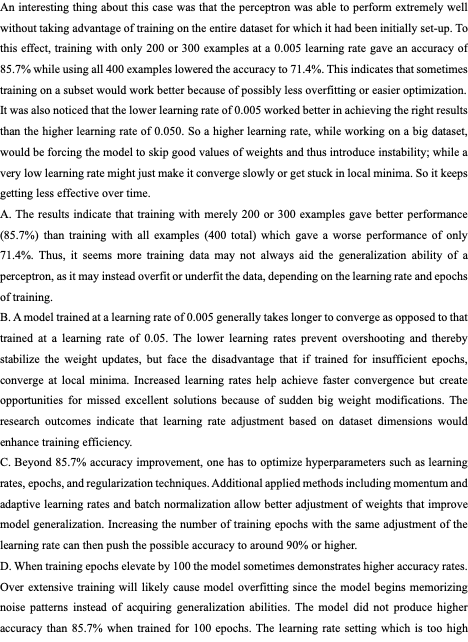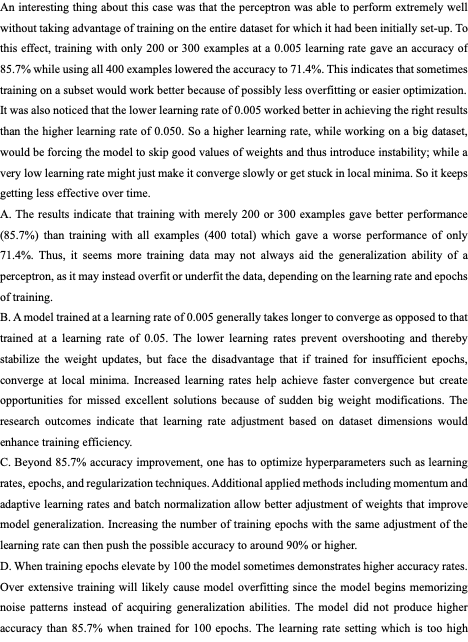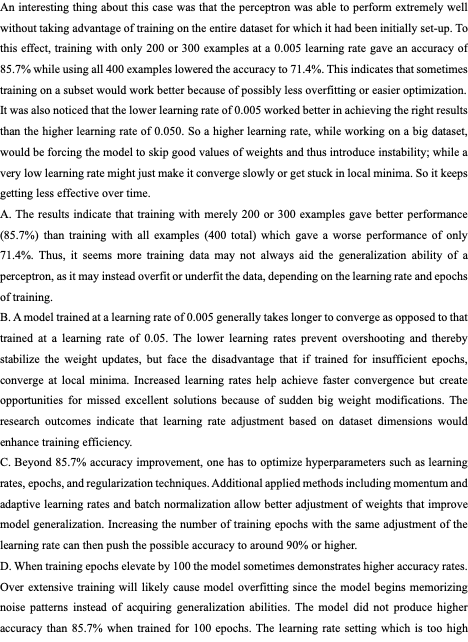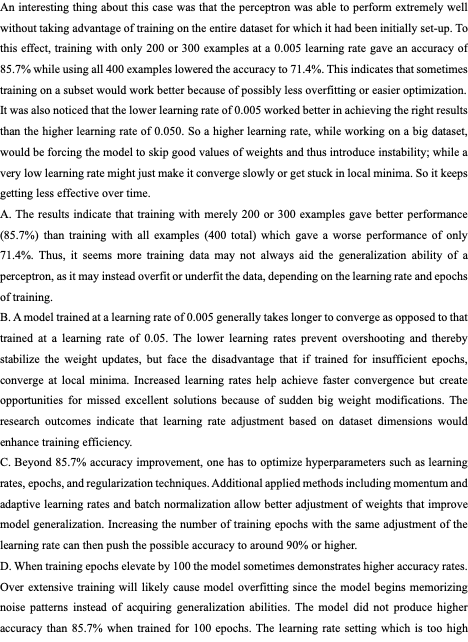



# Comparing performance across various hyperparameter configurations


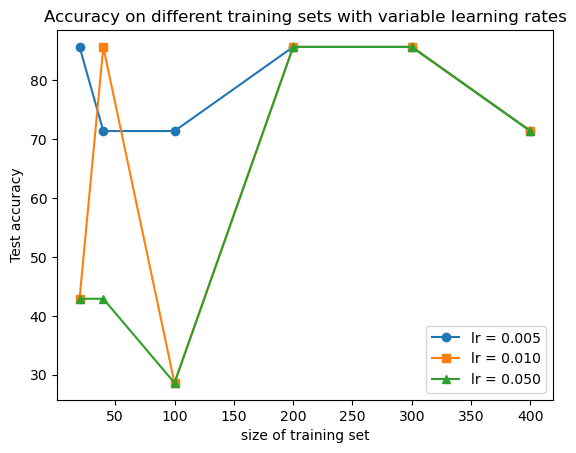

In [10]:
import matplotlib.pyplot as plt

training_sizes = [20, 40, 100, 200, 300, 400]
accuracy_005 = [85.7, 71.4, 71.4, 85.7, 85.7, 71.4]
accuracy_010 = [42.9, 85.7, 28.6, 85.7, 85.7, 71.4]
accuracy_050 = [42.9, 42.9, 28.6, 85.7, 85.7, 71.4]

plt.plot(training_sizes, accuracy_005, marker='o', label="lr = 0.005")
plt.plot(training_sizes, accuracy_010, marker='s', label="lr = 0.010")
plt.plot(training_sizes, accuracy_050, marker='^', label="lr = 0.050")

plt.xlabel("size of training set")
plt.ylabel("Test accuracy")
plt.title("Accuracy on different training sets with variable learning rates")
plt.legend()
plt.show()